In [ ]:
## Bibliothèques générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [ ]:
https://pyvis.readthedocs.io/en/latest/tutorial.html


➡️ Téléversez le fichier ZIP contenant les fichiers .xlsx…


Saving resultat_analyse.zip to resultat_analyse (2).zip
              Pays      PMID        Date  \
2165      Cameroon  34449737  2021/08/28   
2431      Cameroon  26616214  2015/12/01   
1143      Cameroon  31530440  2019/09/19   
610   Burkina Faso  40307918  2025/05/01   
956       Cameroon  27718030  2016/10/09   

                                       Pays_detectés  \
2165                                        Cameroon   
2431  Cameroon; Canada; France; Gabon; United States   
1143                                Cameroon; France   
610          Austria; Burkina Faso; France; Malaysia   
956          Cameroon; Canada; France; United States   

                                         Virus_detectés  
2165  Hepatitis B virus; Hepatitis C virus; Human im...  
2431                                                NaN  
1143                   Human metapneumovirus; Norovirus  
610                                                 NaN  
956                        Human immunodeficiency vi

In [ ]:
data=merged_df.copy()

In [ ]:
uploaded = files.upload()  # Choisir le fichier .xlsx depuis l'interface

# Extraire le nom du fichier uploadé
filename = list(uploaded.keys())[0]

# Charger le fichier Excel
virus_file = pd.read_excel(filename)

Saving nom_des_virus _initial.xlsx to nom_des_virus _initial (1).xlsx


In [ ]:
### Cree un liste  des virus
virus_name=[virus.lower().strip() for virus in virus_file['Virus']]


In [ ]:
virus_name

['bk polyomavirus',
 'banna virus',
 'barmah forest virus',
 'bunyamwera virus',
 'batai virus',
 'ngari virus',
 'la crosse encephalitis virus',
 'snowshoe hare virus',
 'macacine alphaherpesvirus 1;',
 'chandipura virus',
 'chikungunya virus',
 'human cosavirus a',
 'cowpox virus',
 'coxsackievirus a',
 'coxsackievirus b',
 'crimean-congo hemorrhagic fever virus',
 'dengue virus',
 'dhori virus',
 'dugbe virus',
 'beiji nairovirus',
 'eastern equine encephalitis virus',
 'ebolavirus za?re',
 'echovirus',
 'encephalomyocarditis virus',
 'epstein-barr virus',
 'hepatitis g virus',
 'hendra virus',
 'hepatitis a virus',
 'hepatitis b virus',
 'hepatitis c virus',
 'hepatitis e virus',
 'hepatitis delta virus',
 'human adenovirus',
 'human astrovirus',
 'human coronavirus',
 'human cytomegalovirus',
 'human enterovirus d68',
 'human herpesvirus 1',
 'human herpesvirus 2',
 'human herpesvirus 6',
 'human herpesvirus 7',
 'human herpesvirus 8',
 'human immunodeficiency virus',
 'human meta

In [ ]:
# Créer  avec toutes les nouvelles colonnes de virus
new_columns = pd.DataFrame(0, index=data.index, columns=virus_name)

# Concaténer avec le DataFrame original
data = pd.concat([data, new_columns], axis=1)

In [ ]:
for index, row in data.iterrows():
    cell = row["Virus_detectés"]


    if pd.isna(cell):  # Si la cellule est vide (NaN), on la saute
        continue

    detected = cell.split(";")
    for virus in detected:
        virus = virus.strip().lower()
        # Vérifie si le nom du 'virus' est une colonne
        if virus in data.columns :
            data.at[index, virus] += 1


In [ ]:
data1=data.drop(["PMID","Pays", "Date", "Pays_detectés","Virus_detectés"], axis=1)

In [ ]:
totaux = data1.select_dtypes(include=['number']).sum()

In [ ]:
# Création d'un nouveau DataFrame pour le total
df_total = pd.DataFrame([totaux], index=["Total"])

In [ ]:
df_total

bk polyomavirus  banna virus  barmah forest virus  bunyamwera virus  \
Total                0            0                    0                 0   

       batai virus  ngari virus  la crosse encephalitis virus  \
Total            0            0                             0   

       snowshoe hare virus  macacine alphaherpesvirus 1;  chandipura virus  \
Total                    0                             0                 0   

       ...  smallpox virus  venezuelan equine encephalitis virus  \
Total  ...               5                                     0   

       indiana vesiculovirus  western equine encephalitis virus  \
Total                      2                                  0   

       wu polyomavirus  west nile virus  yaba monkey tumor virus  \
Total               11               16                        0   

       tanapox virus  yellow fever virus  zika virus  
Total            160                  41          36  

[1 rows x 123 columns]

In [ ]:
data_final =df_total.transpose()

In [ ]:
#print(list(data_final.index))
data_final.index.name = "virus_name"
# Transformer l'index en colonne et lui donner le nom "virus_name"
data_final = data_final.reset_index().rename(columns={'index': 'virus_name'})

['bk polyomavirus', 'banna virus', 'barmah forest virus', 'bunyamwera virus', 'batai virus', 'ngari virus', 'la crosse encephalitis virus', 'snowshoe hare virus', 'macacine alphaherpesvirus 1;', 'chandipura virus', 'chikungunya virus', 'human cosavirus a', 'cowpox virus', 'coxsackievirus a', 'coxsackievirus b', 'crimean-congo hemorrhagic fever virus', 'dengue virus', 'dhori virus', 'dugbe virus', 'beiji nairovirus', 'eastern equine encephalitis virus', 'ebolavirus za?re', 'echovirus', 'encephalomyocarditis virus', 'epstein-barr virus', 'hepatitis g virus', 'hendra virus', 'hepatitis a virus', 'hepatitis b virus', 'hepatitis c virus', 'hepatitis e virus', 'hepatitis delta virus', 'human adenovirus', 'human astrovirus', 'human coronavirus', 'human cytomegalovirus', 'human enterovirus d68', 'human herpesvirus 1', 'human herpesvirus 2', 'human herpesvirus 6', 'human herpesvirus 7', 'human herpesvirus 8', 'human immunodeficiency virus', 'human metapneumovirus', 'human papillomavirus', 'huma

In [ ]:
# Données filtrées
data_filtered = data_final[data_final['Total'] > 0]
sizes = data_filtered['Total']
labels = data_filtered['virus_name']

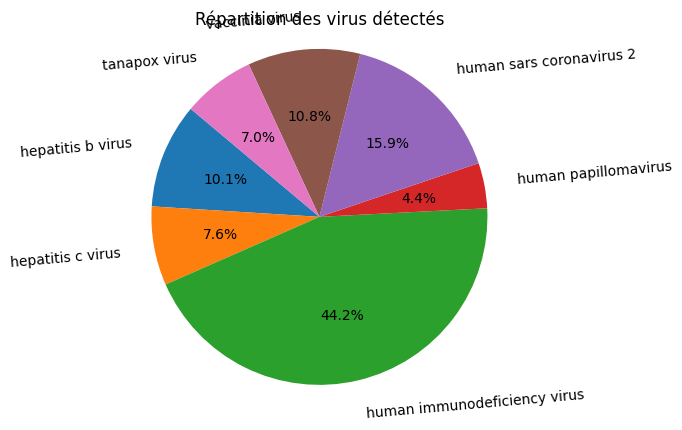

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np



# Création du graphique
fig, ax = plt.subplots()

# Création du pie chart sans labels pour les ajouter manuellement
wedges, texts, autotexts = ax.pie(
    sizes, labels=None, autopct='%1.1f%%', startangle=140)

# Titre et égalité des axes
ax.set_title("Répartition des virus détectés")
ax.axis('equal')

# Ajout des labels manuellement avec rotation
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    ax.text(
        x * 1.2, y * 1.2, labels.iloc[i],
        horizontalalignment=horizontalalignment,
        verticalalignment='center',
        rotation=5,
        rotation_mode='anchor'
    )

plt.show()



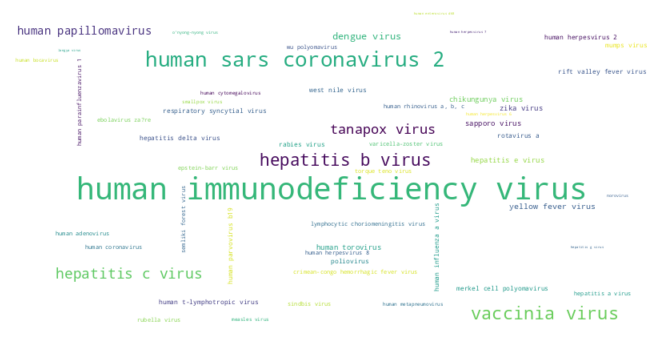

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer un dictionnaire {mot: poids} à partir de vos données
word_weights = dict(zip(data_filtered['virus_name'], data_filtered['Total']))

# Générer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # fond blanc
    #margin=2,                  # marge réduite
    colormap='viridis'          # palette de couleurs (peut être changée)
).generate_from_frequencies(word_weights)

# Afficher le nuage de mots
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactiver les axes
plt.tight_layout(pad=0)
plt.show()

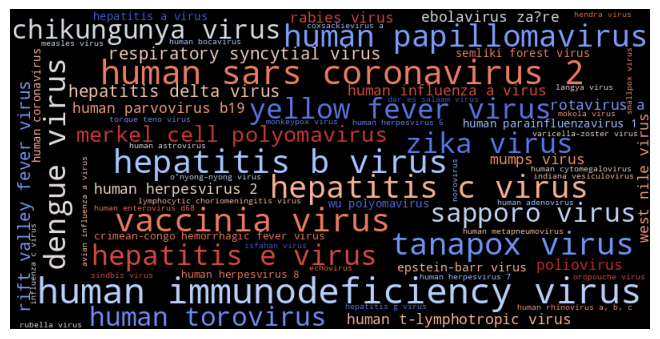

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dictionnaire {mot: poids}
word_weights = dict(zip(data_filtered['virus_name'], data_filtered['Total']))

# Nuage de mots ultra-compact
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='Black',
    colormap='coolwarm',       # ou 'plasma', 'magma' pour plus de contraste
    #prefer_horizontal=0.5,    # favorise l'horizontalité (0.9 = 90%)
    scale=1,                  # qualité de rendu (augmente la compaction)
    collocations=True,       # évite les répétitions adjacentes
    min_font_size=6,          # taille minimale des mots
    #max_words=200,            # limite le nombre de mots
    relative_scaling=0.1      # 0 = taille purement basée sur le poids, 1 = plus écart
).generate_from_frequencies(word_weights)

# Affichage sans bordures
plt.figure()  # Taille et résolution ajustées
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

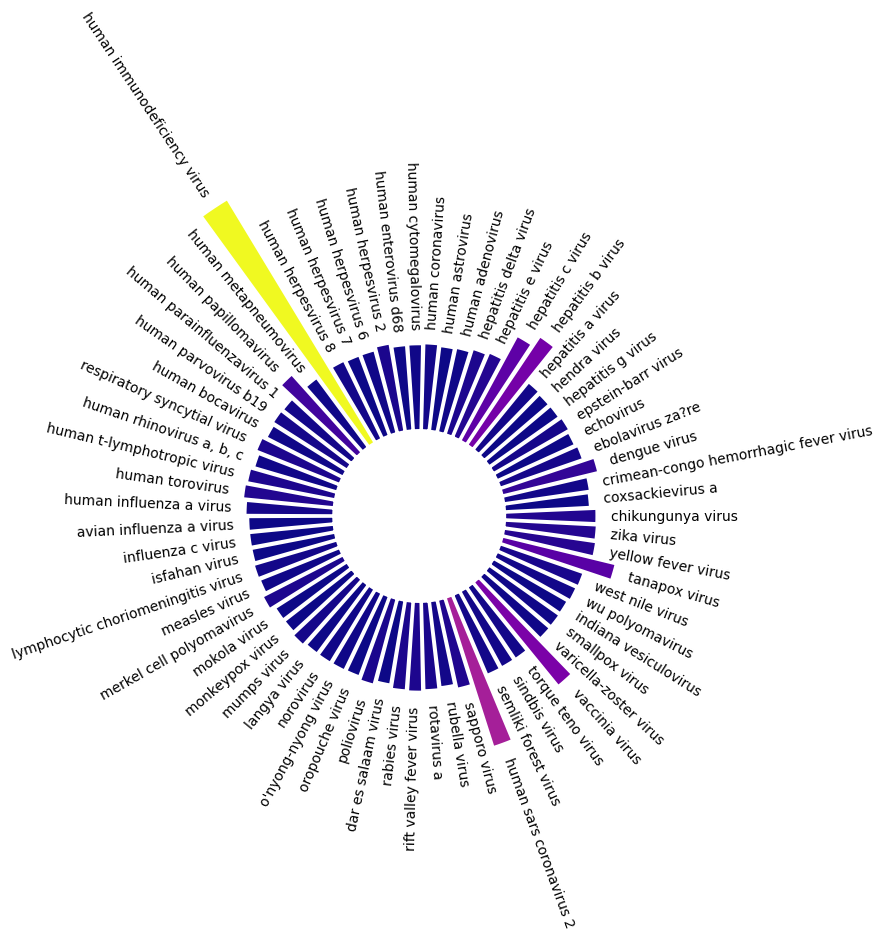

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que 'data_filtered' est bien défini avec 'Total' et 'virus_name'

# Préparation des données
sizes = data_filtered['Total'].values
labels = data_filtered['virus_name'].values

# Paramètres pour le graphique polaire
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Limites et calculs pour les hauteurs des barres
upperLimit = 100
lowerLimit = 30
max_val = sizes.max()

# Conversion des tailles en hauteurs adaptées à la plage (lowerLimit -> upperLimit)
slope = (upperLimit - lowerLimit) / max_val
heights = slope * sizes + lowerLimit

# Largeur et angle des barres
num_bars = len(sizes)
width = 2 * np.pi / num_bars
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)

# Dessin des barres
bars = ax.bar(
    x=angles,
    height=heights,
    width=width * 0.9,  # légèrement moins large pour espacer les barres
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=plt.cm.plasma(sizes / max_val)  # couleur en fonction de la taille
)

# Ajout des labels aux extrémités des barres
for angle, height, label in zip(angles, heights, labels):
    rotation = np.degrees(angle)
    alignment = "left"
    # On ajuste l'angle du texte pour qu'il soit lisible
    if angle >= np.pi / 2 and angle <= 3 * np.pi / 2:
        rotation += 180
        alignment = "right"
    ax.text(
        x=angle,
        y=height + 35,  # un peu au-dessus de la barre
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=10
    )

plt.show()


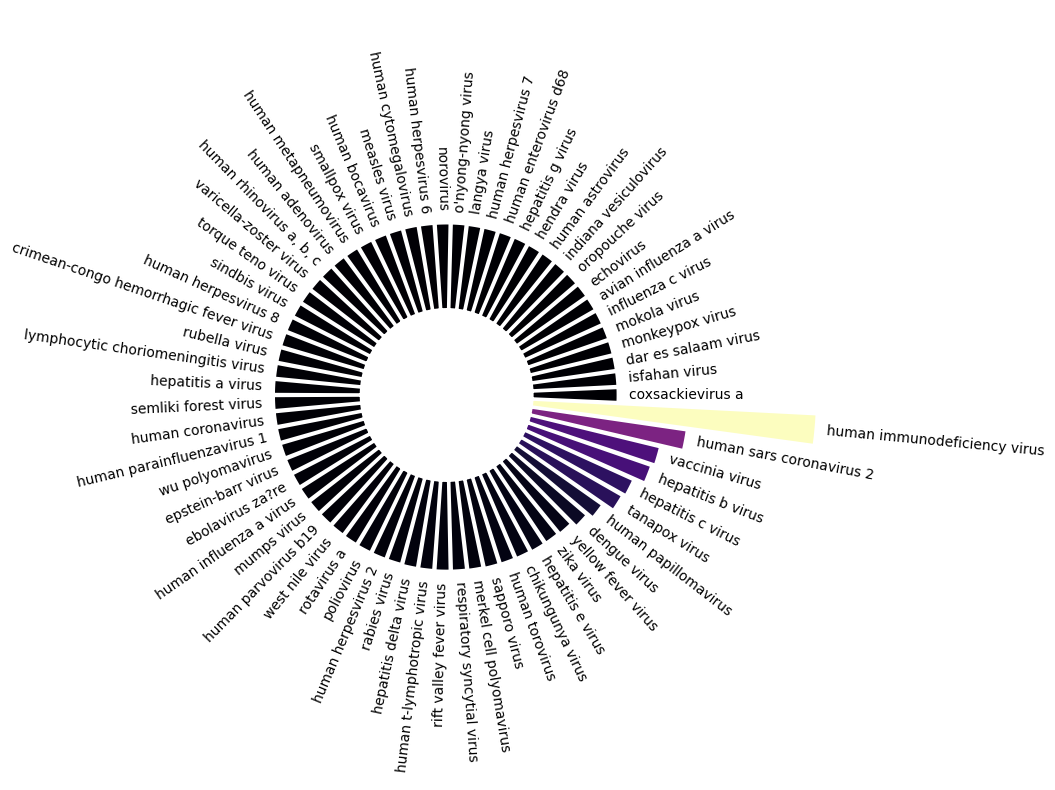

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# On part de ton data_filtered, avec 'virus_name' et 'Total'
sizes = data_filtered['Total'].values
labels = data_filtered['virus_name'].values

# Trier les données par taille pour un rendu plus lisible (optionnel)
sorted_indices = np.argsort(sizes)
sizes = sizes[sorted_indices]
labels = labels[sorted_indices]

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constantes pour la mise en forme
upperLimit = 100
lowerLimit = 30
labelPadding = 4

max_val = sizes.max()

# Calcul des hauteurs des barres dans la plage [lowerLimit, upperLimit]
slope = (upperLimit - lowerLimit) / max_val
heights = slope * sizes + lowerLimit

# Largeur de chaque barre (en radians)
num_bars = len(sizes)
width = 2 * np.pi / num_bars

# Angles centrés des barres
indexes = np.arange(num_bars)
angles = indexes * width

# Tracer les barres
bars = ax.bar(
    x=angles,
    height=heights,
    width=width * 0.9,  # un peu d'espace entre les barres
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    #color="#2e8bc0",
    #color=plt.cm.magma(sizes / max_val),
    color=plt.cm.magma(sizes / max_val)

)

# Ajouter les labels, avec rotation adaptée
for bar, angle, height, label in zip(bars, angles, heights, labels):
    rotation = np.rad2deg(angle)
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + height + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor",

        fontsize=10
    )

plt.show()


In [ ]:
data_filtered100 = data_final[data_final['Total'] > 50]
sizes = data_filtered100['Total']
labels = data_filtered100['virus_name']
import plotly.express as px

fig = px.scatter(
    data_filtered100,
    x="virus_name",  # ou une autre colonne numérique si disponible
    y="Total",
    size="Total",
    color="virus_name",  # optionnel : couleur par virus
    hover_name="virus_name",  # Texte affiché au survol
    hover_data={"Total": True, "virus_name": False},  # Infos supplémentaires
    title="Distribution des virus par quantité totale"
)

fig.update_traces(
    marker=dict(sizemode='diameter'),  # Ajuste la taille des bulles
    hovertemplate="<b>%{hovertext}</b><br>Quantité: %{y}<extra></extra>"
)

fig.show()

In [ ]:
import altair as alt

alt.Chart(data_filtered100).mark_circle().encode(
    x='virus_name:N',  # N = nominal (catégoriel)
    y='Total:Q',      # Q = quantitatif
    size='Total:Q',
    color='virus_name:N',
    tooltip=['virus_name', 'Total']  # Infobulles
).properties(
    width=600,
    title="Quantité de virus par type"
).interactive()  # Rend le graphique zoomable/déplaçable

alt.Chart(...)

In [ ]:
%pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

# Initialisation de l'app
app = Dash(__name__)

# Supposons que vos données sont déjà chargées dans `data_filtered` :
# data_filtered = data_final[data_final['Total'] > 0]

# Création du graphique interactif avec vos données
fig = px.scatter(
    data_filtered,
    x="virus_name",          # Axe X : noms des virus
    y="Total",               # Axe Y : quantité totale
    size="Total",            # Taille des bulles proportionnelle à 'Total'
    color="virus_name",      # Couleur par type de virus (optionnel)
    hover_name="virus_name", # Texte affiché au survol
    hover_data={"Total": ":.0f"},  # Format numérique sans décimales
    title="Distribution des virus détectés",
    size_max=40             # Ajustez la taille maximale des bulles
)

# Personnalisation supplémentaire (optionnelle)
fig.update_layout(
    xaxis_title="Type de virus",
    yaxis_title="Nombre total de détections",
    hovermode="closest"     # Infobulle plus précise au survol
)

# Mise en page de l'app
app.layout = html.Div([
    dcc.Graph(
        id='virus-distribution',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

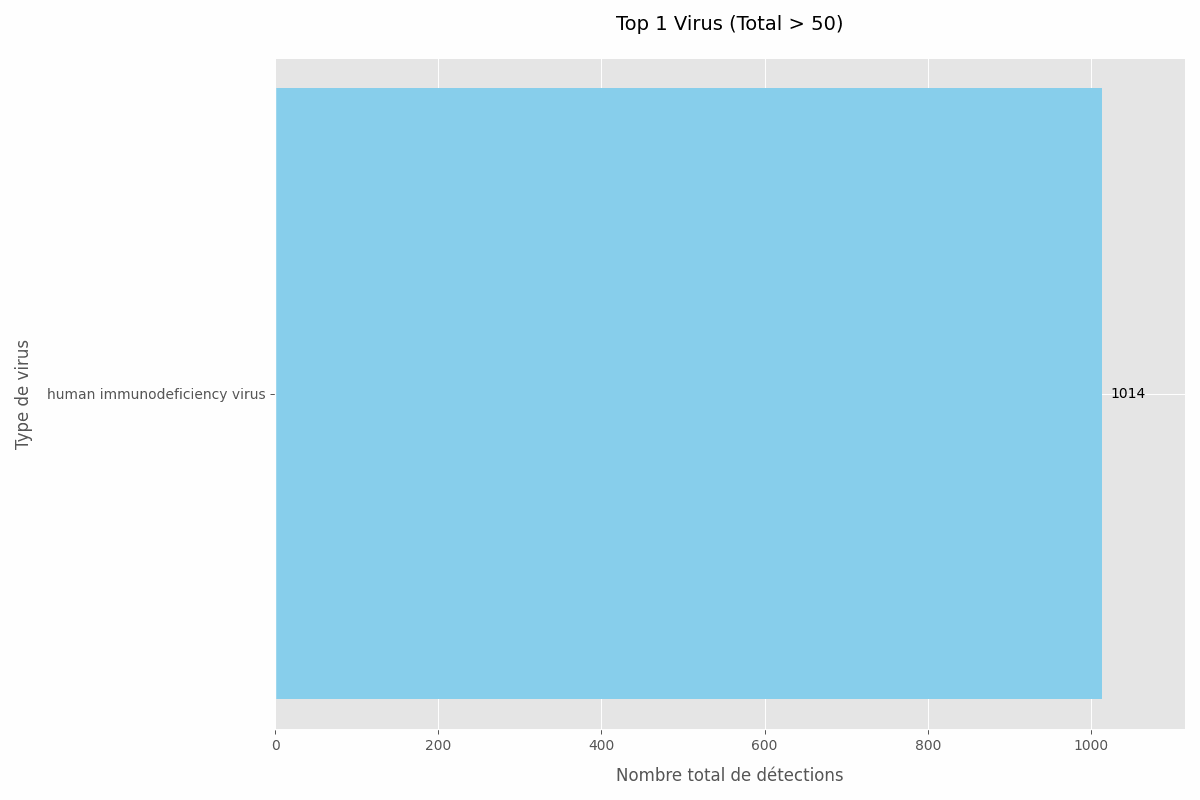

In [ ]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Configuration initiale
plt.style.use('ggplot')  # Style plus moderne
fig, ax = plt.subplots(figsize=(12, 8))
frames = []

# Tri initial des données (assurez-vous que data_filtered100 est défini)
data_sorted = data_filtered100.sort_values('Total', ascending=False)

for i in range(1, len(data_sorted)+1):
    ax.clear()
    subset = data_sorted.head(i)  # Plus efficace que nlargest

    # Graphique en barres horizontales
    bars = ax.barh(subset['virus_name'], subset['Total'], color='skyblue')

    # Ajout des valeurs sur les barres
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max(data_sorted['Total'])*0.01,
                bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                va='center')

    # Paramètres esthétiques
    ax.set_title(f'Top {i} Virus (Total > 50)', pad=20, fontsize=14)
    ax.set_xlabel('Nombre total de détections', labelpad=10)
    ax.set_ylabel('Type de virus', labelpad=10)
    ax.set_xlim(0, max(data_sorted['Total']) * 1.1)  # Marge à droite

    # Capture de la frame
    fig.tight_layout()  # Évite les chevauchements
    fig.canvas.draw()
    frames.append(np.array(fig.canvas.renderer.buffer_rgba()))

# Sauvegarde en GIF avec optimisation
try:
    imageio.mimsave('virus_animation.gif',
                   frames,
                   fps=1,  # Plus lent pour mieux voir
                   subrectangles=True)  # Compression intelligente
except Exception as e:
    print(f"Erreur lors de la sauvegarde : {e}")

plt.close()

# Pour afficher le GIF dans Jupyter (si nécessaire)
from IPython.display import Image
Image(filename='virus_animation.gif')


In [ ]:
### avec date

data_date=data.drop(["Pays",  "Pays_detectés","Virus_detectés"], axis=1)

In [ ]:
data_date.iloc[:, 2:].columns


Index(['bk polyomavirus', 'banna virus', 'barmah forest virus',
       'bunyamwera virus', 'batai virus', 'ngari virus',
       'la crosse encephalitis virus', 'snowshoe hare virus',
       'macacine alphaherpesvirus 1;', 'chandipura virus',
       ...
       'smallpox virus', 'venezuelan equine encephalitis virus',
       'indiana vesiculovirus', 'western equine encephalitis virus',
       'wu polyomavirus', 'west nile virus', 'yaba monkey tumor virus',
       'tanapox virus', 'yellow fever virus', 'zika virus'],
      dtype='object', length=123)

In [ ]:
import pandas as pd
import datetime as dt
data_date['Date'] = pd.to_datetime(data_date['Date'])
data_date['Date']= data_date['Date'].dt.year

In [ ]:
print(data_date['Date'].unique())

[2022 2024 2021 2023 2012 2020 2018 2016 2019 2017 2015 2013 2025 2011
 2010 1995 2007 2009 2014 1998 2006 2003 2004 2008 1997 1990 1999 2000
 2005 1991 2002 1996 2001 1994 1993 1989 1992 1988]


In [ ]:
## TRANSFORMER  LES DONNes
melted_data = data_date.melt(
    id_vars=['PMID', 'Date'],
    value_vars=data_date.iloc[:, 2:].columns,
    var_name='virus_name',
    value_name='Total'
)

In [ ]:

print(melted_data['Date'].unique())

[2022 2024 2021 2023 2012 2020 2018 2016 2019 2017 2015 2013 2025 2011
 2010 1995 2007 2009 2014 1998 2006 2003 2004 2008 1997 1990 1999 2000
 2005 1991 2002 1996 2001 1994 1993 1989 1992 1988]


In [ ]:
data_date_regroupe=melted_data.groupby(['virus_name','Date']).sum().reset_index()

In [ ]:

print(data_date_regroupe['Date'].unique())

[1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]


In [ ]:
data_date_regroupe.drop("PMID",axis=1)

virus_name  Date  Total
0     avian influenza a virus  1988      0
1     avian influenza a virus  1989      0
2     avian influenza a virus  1990      0
3     avian influenza a virus  1991      0
4     avian influenza a virus  1992      0
...                       ...   ...    ...
4669               zika virus  2021      1
4670               zika virus  2022      6
4671               zika virus  2023      2
4672               zika virus  2024      8
4673               zika virus  2025      0

[4674 rows x 3 columns]

In [ ]:
import plotly.express as px

fig = px.bar(data_date_regroupe, x="virus_name", y="Total", color="virus_name",
  animation_frame="Date", animation_group="Date") #, range_y=[0,4000000000])


fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
# Exporter en fichier Excel
df_total.to_excel("data2_export.xlsx", index=False)

# Télécharger depuis Colab
from google.colab import files
files.download("data2_export.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>